In [1]:
import pandas as pd

In [2]:
#Import the data from the excel format. Skip one row.
df = pd.read_excel('Württemberg_Landtagswahl1932.xlsx', sheet_name='Sheet2', skiprows=1)

In [3]:
#First, let's work with the first column. There are numbers, NaN's and question marks. We want to get rid of the question marks manually, but first have to identify them.
#Let's rename the column to ID.
df.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
#Replace question marks with NaN's.
df['ID'] = df['ID'].replace('?', float('NaN'))
#Convert all NaN's to zero, then the column to int.
df['ID'] = df['ID'].fillna(0)
df['ID'] = df['ID'].astype(int)

In [4]:
#Now, we don't want empty rows. One type of them is the OA's. If the second column starts with OA, we want to delete the row. First, rename the second column to Name.
df.rename(columns={'Oberamt/Gemeinde ': 'Name'}, inplace=True)
#Now, we can delete the rows.
df = df[~df['Name'].str.startswith('OA')]
#If it includes 'Summe' only, then delete the row.
df = df[~df['Name'].str.contains('Summe')]
#Change the index to the ID column.
df.set_index('ID', inplace=True)

In [5]:
#Create a new column, that is the results of last column divided with the fourth column as a percentage. First, convert the last column to int.
#Delete spaces in the last column. Convert to str first.
df.iloc[:, -1] = df.iloc[:, -1].astype(str)
df.iloc[:, -1] = df.iloc[:, -1].str.replace(' ', '')
#Replace 'nan' with the first column.
df.iloc[:, -1] = df.iloc[:, -1].str.replace('nan', '1')
#Now, convert to int.
df.iloc[:, -1] = df.iloc[:, -1].astype(int)
#Replace where ID is 20922, the third column with 5884. Problem with a 0. Check it again.
df.loc[20922, df.columns[3]] = 5884
#Replace 0's
df['NS%'] = df.iloc[:, -1] / df.iloc[:, 3] * 100
#Convert third column to int.
df.iloc[:, 3] = df.iloc[:, 3].astype(float)

In [6]:
#Import mmborders_python.csv.
df2 = pd.read_csv('mmborders_python.csv')
#If the index i is in the first column of df2, change index i with the secind column of df2.
for i in df2.iloc[:, 0]:
    if i in df.index:
        df.rename(index={i: df2.loc[df2.iloc[:, 0] == i].iloc[0, 1]}, inplace=True)
#Groupby ID, sum the columns. We keep only 
df = df.groupby(df.index).sum()

In [7]:
df['NS%'] = df.iloc[:, -1] / df.iloc[:, -2] * 100
#Show the data, ascending by the NS% column.
df.sort_values(by='NS%')
#Drop if the NS% is over 100.
df = df[df['NS%'] <= 100]

In [8]:
#Keep only index and last column.
sdf = df.iloc[:, -1]
#Reset index.
sdf = sdf.reset_index()
#Export as a stata file.
sdf.to_stata('Württemberg_Landtagswahl1932.dta', write_index=False)

c:\Users\bt307300\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\stata.py:2491: InvalidColumnName: 
Not all pandas column names were valid Stata variable names.
The following replacements have been made:

    NS%   ->   NS_

If this is not what you expect, please make sure you have Stata-compliant
column names in your DataFrame (strings only, max 32 characters, only
alphanumerics and underscores, no Stata reserved words)

  warnings.warn(ws, InvalidColumnName)


In [9]:
import geopandas
#Import the shapefile.
gdf = geopandas.read_file('MapShapeFile/dissolved.shp')
#Have ID as index.
gdf.set_index('ID', inplace=True)
#Drop to_merge.
gdf.drop('to_merge', axis=1, inplace=True)

In [10]:
#Merge df with gdf.
gdf = gdf.merge(df, left_index=True, right_index=True)

(433262.99284893775, 618477.7403152563, 5259267.45549226, 5504385.202979554)

<Figure size 10000x10000 with 0 Axes>

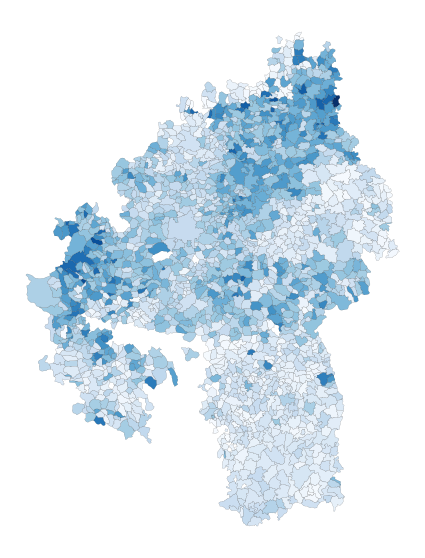

In [11]:
#Visualize the data. No legend and axes.
import matplotlib.pyplot as plt
#DPI 300, 10x10 inches.
plt.figure(figsize=(20, 20), dpi=500)
#Disable axes.
gdf.plot(column='NS%', cmap='Blues', legend=False, figsize=(10, 10), edgecolor='black', linewidth=0.1)
plt.axis('off')

In [12]:
#Save gdf as a csv file to the desktop.
gdf.to_csv('C:/Users/bt307300/Desktop/Württemberg_Landtagswahl1932.csv')

In [14]:
#Drop everything except the last column. Name this dataframe ns.
ns = gdf.iloc[:, -1]

In [17]:
#Save ns as a csv file to the desktop.
ns.to_csv('C:/Users/bt307300/Desktop/NS.csv')